In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pip
# pip.main(["install", "openpyxl"])
%matplotlib inline

In [2]:
df_log2298 = pd.read_excel(r'~/SCALOS/project/runlogs/Autosort Run Log 2298.xlsx')
df_log2320 = pd.read_excel(r'~/SCALOS/project/runlogs/Autosort Run Log 2320.xlsx')
df_log2326 = pd.read_excel(r'~/SCALOS/project/runlogs/Autosort Run Log 2326.xlsx')
df_log2331 = pd.read_excel(r'~/SCALOS/project/runlogs/Autosort Run Log 2331.xlsx')
df_data2298 = pd.read_csv(r'~/SCALOS/project/data/finaldata_uw2298.csv')
df_data2320 = pd.read_csv(r'~/SCALOS/project/data/finaldata_uw2320.csv')
df_data2326 = pd.read_csv(r'~/SCALOS/project/data/finaldata_uw2326.csv')
df_data2331 = pd.read_csv(r'~/SCALOS/project/data/finaldata_uw2331.csv')

In [3]:
def runlog_cleanup(df_log2298, df_log2320, df_log2326, df_log2331):
    # clean up uw2298
    del df_log2298["Riley's Stress Level"]                                    # delete unncessary column 
    df_log2298.rename(columns = {'FLAP L/R':'IB FLAP L/R'}, inplace = True)   # Rename inconsistant column
    df_log2298.rename(columns = {'AIL L/R':'OB AIL L/R'}, inplace = True)     # Rename inconsistant column
    df_log2298.rename(columns = {'LE DEF':'LE IB/OB'}, inplace = True)        # Rename inconsistant column
    df_log2298.rename(columns = {'TRIP DEF':'TRIP DOTS'}, inplace = True)     # Rename inconsistant column
    df_log2298.insert(1,'TEST', 2298)                                         # add entry number 
    df_log2298['Nacelle Blockage L/R']= np.nan
    df_log2298['Spoiler L/R']= np.nan
    temp = df_log2298['DATE']
    del df_log2298['DATE']
    df_log2298['DATE']= temp
    df_log2298.columns.tolist() 
    # clean up uw2320
    df_log2320.rename(columns = {'FLAP L/R':'IB FLAP L/R'}, inplace = True)
    df_log2320.rename(columns = {'AIL L/R':'OB AIL L/R'}, inplace = True)
    df_log2320.rename(columns = {'TRIP DEF':'TRIP DOTS'}, inplace = True)
    df_log2320.insert(1,'TEST', 2320)
    df_log2320['Nacelle Blockage L/R']= np.nan
    df_log2320['Spoiler L/R']= np.nan
    temp = df_log2320['DATE']
    del df_log2320['DATE']
    df_log2320['DATE']= temp
    # clean up uw2326
    df_log2326.insert(1,'TEST', 2326)
    df_log2326['Nacelle Blockage L/R']= np.nan
    df_log2326['Spoiler L/R']= np.nan
    temp = df_log2326['DATE']
    del df_log2326['DATE']
    df_log2326['DATE']= temp
    # clean up uw2331 
    df_log2331.insert(1,'TEST', 2331)
    # column title are consistant 
    if df_log2298.columns.tolist() !=  df_log2320.columns.tolist():
        raise ValueError("Either 2298 or 2320 data is not right!") 

    if df_log2298.columns.tolist() !=  df_log2326.columns.tolist():
        raise ValueError("Either 2298 or 2326 data is not right!")

    if df_log2298.columns.tolist() !=  df_log2331.columns.tolist():
        raise ValueError("Either 2298 or 2331 data is not right!")

    # Concatinate all run logs into single data frame
    df_log = pd.concat([df_log2298, df_log2320, df_log2326, df_log2331], ignore_index=True,axis=0)
#     # Exclude weight tare runs
#     df_log[np.isnan(df_log['WT.\nTARE\nRUN']) == False]
    return df_log, df_log2298, df_log2320, df_log2326, df_log2331

In [4]:
def data_cleanup(df_data2298, df_data2320, df_data2326, df_data2331):
    if df_data2298.columns.tolist() !=  df_data2320.columns.tolist():
        raise ValueError("Either 2298 or 2320 data is not right!")

    if df_data2298.columns.tolist() !=  df_data2326.columns.tolist():
        raise ValueError("Either 2298 or 2326 data is not right!")

    if df_data2298.columns.tolist() !=  df_data2331.columns.tolist():
        raise ValueError("Either 2298 or 2331 data is not right!")

    df_data = pd.concat([df_data2298, df_data2320, df_data2326, df_data2331], ignore_index=True,axis=0)
    return df_data

In [5]:
df_log, df_log2298, df_log2320, df_log2326, df_log2331 = runlog_cleanup(df_log2298, df_log2320, df_log2326, df_log2331 )
df_data = data_cleanup(df_data2298, df_data2320, df_data2326, df_data2331)

In [28]:
def data_extract(df_log, df_data, test, runnum):
    # Unit test 
    if type(test) != type(runnum): 
        raise ValueError("Test entries and run numbers must be consistant")    

    df_data_sub = pd.DataFrame()
    df_log_sub = pd.DataFrame()
    # Unit test 
    for i in range(len(test)):
        # Entries must be integer
        if not isinstance(test[i], int) or not isinstance(runnum[i], int):
            raise ValueError("Test entries and run numbers must be integer!")

        # Entries must be not empty 
        if not np.any(test[i]) or not np.any(runnum[i]):
            raise ValueError("Test entries and run numbers must be not empty!")

        # Test entries must be valid 
        if not any(np.unique(df_log[df_log.columns.tolist()[1]]) == test[i]):
            raise ValueError("Test entries are invalid!")

        # Run number must be valid 
        if runnum[i] < 0 or runnum[i] > np.max(df_log[df_log.columns.tolist()[0]][df_log[df_log.columns.tolist()[1]] == test[i]]):
            raise ValueError("Run numbers are invalid!")

        # Entries must be not weight tare 
        if np.any(pd.isna(df_log[df_log.columns.tolist()[2]][(df_log[df_log.columns.tolist()[1]] == test[i]) & (df_log[df_log.columns.tolist()[1]] == runnum[i])])):
            raise ValueError("Test num and corresponding run num is weight tare")

        df_log_sub  = pd.concat([df_log_sub,  df_log[(df_log[df_log.columns.tolist()[1]] == test[i]) & (df_log[df_log.columns.tolist()[0]] == runnum[i])]], ignore_index = True, axis = 0)
        df_data_sub = pd.concat([df_data_sub, df_data[(df_data[df_data.columns.tolist()[1]] == test[i]) & (df_data[df_data.columns.tolist()[0]] == runnum[i])]], ignore_index = True, axis = 0) 

    # Run type must be consistant
    if len(pd.unique(df_log_sub[df_log.columns.tolist()[4]][0])) > 1:
        raise ValueError("Run type is inconsistant!")
        
    return df_log_sub, df_data_sub 

In [29]:
test = [2320, 2320, 2320, 2320, 2320]
runnum = [49, 51, 37, 56, 57]
df_log_sub, df_data_sub = data_extract(df_log, df_data, test, runnum)

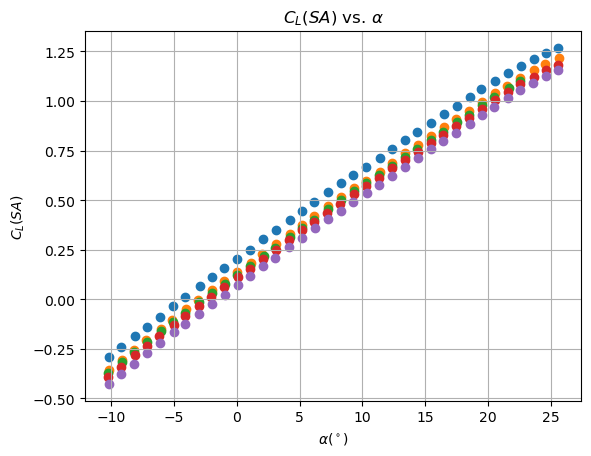

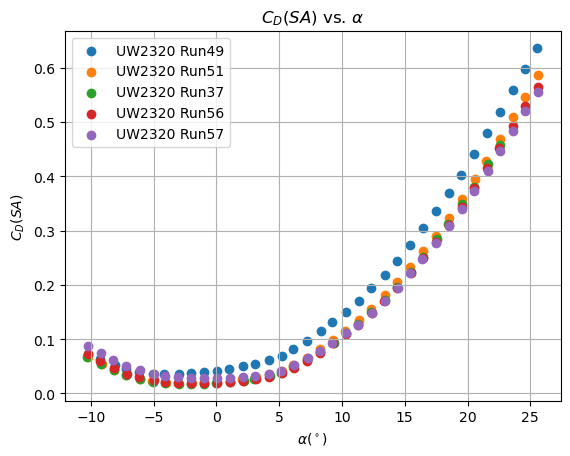

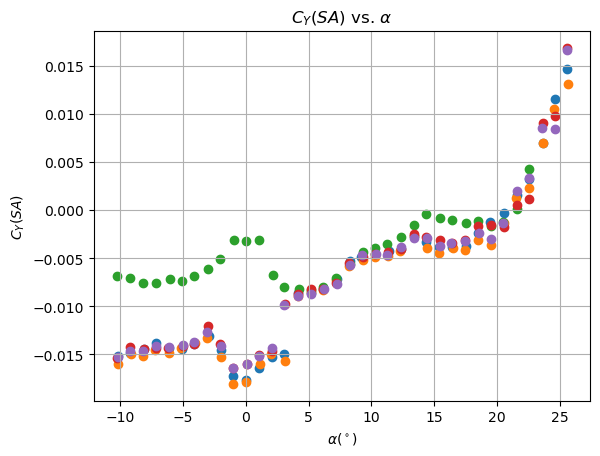

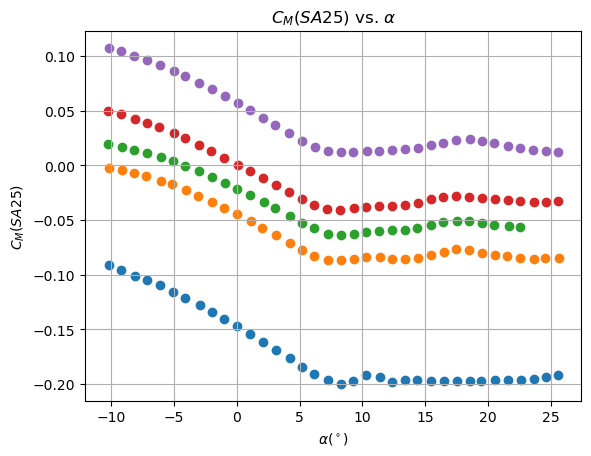

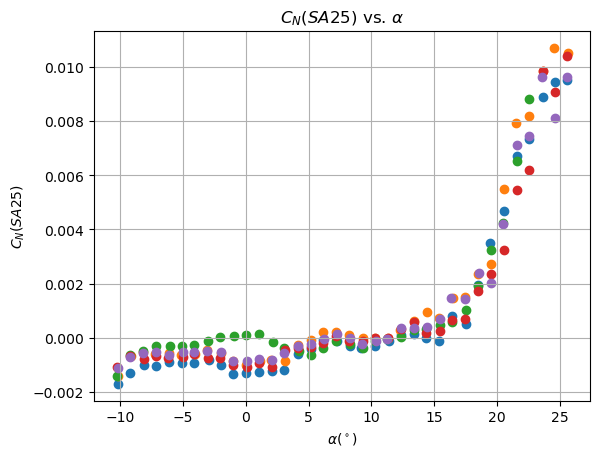

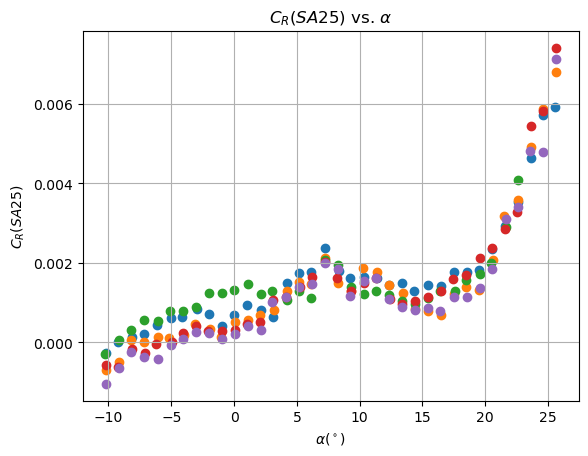

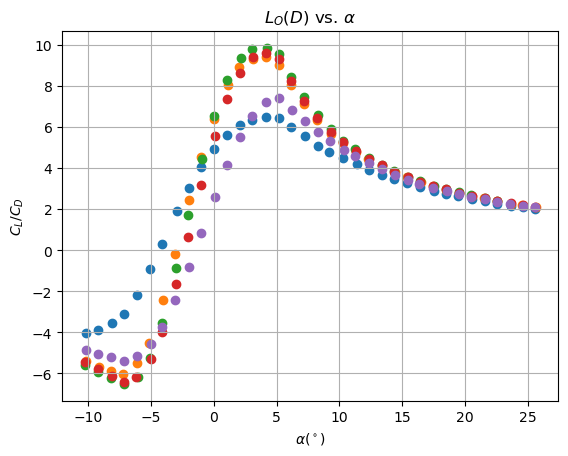

In [121]:
plotvars = ["CLSA", "CDSA", "CYSA", "CMSA25", "CNSA25", "CRSA25", "LOD"]
if pd.unique(df_log_sub[df_log.columns.tolist()[4]][0]) == 'P6':
    alphabeta = df_data_sub.columns.tolist()[3]
    x_label = "\\alpha"
elif pd.unique(df_log_sub[df_log.columns.tolist()[4]][0]) == 'Y6':
    alphabeta = df_data_sub.columns.tolist()[4]
    x_label = "\\beta"
else:
    raise ValueError("Run type error!")

for j in range(len(plotvars)):
    plt.figure()
    for i in range(len(test)):
        # plt.bar(df_2016['hour'], df_2016[hour])plt.xlabel('Time of day')
        plt.scatter(df_data_sub[alphabeta][(df_data_sub[df_data_sub.columns.tolist()[1]] == test[i]) & (df_data_sub[df_data_sub.columns.tolist()[0]] == runnum[i])],
             df_data_sub[plotvars[j]][(df_data_sub[df_data_sub.columns.tolist()[1]] == test[i]) & (df_data_sub[df_data_sub.columns.tolist()[0]] == runnum[i])], 
             label='UW'+str(test[i])+' Run'+str(runnum[i]))
    plt.xlabel(r"$"+x_label+" (^\circ)$")
    if plotvars[j] == "LOD":
        y_label = "C_L/C_D"
        plt.ylabel(r"$$")
    else:
        plt.ylabel(r"$"+plotvars[j][0]+"_"+plotvars[j][1]+"("+plotvars[j][2:]+")$")
    plt.ylabel(r")
    if j == 1:
        plt.legend()
    plt.title(r"$"+plotvars[j][0]+"_"+plotvars[j][1]+"("+plotvars[j][2:]+")$"+' vs. '+ r"$"+x_label+"$")
    plt.grid(True)
    plt.show()


'SA'